In [1]:
import serial
import matplotlib.pyplot as plt
import atexit
from time import sleep
import pandas as pd
import os
import os
print(os.environ['PATH'])

/home/mv_yurchenko/.local/bin:/home/mv_yurchenko/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


# Подключаем Ардуино

### Открытие порта

In [4]:
serialArduino = serial.Serial("/dev/ttyUSB0", baudrate=115200 ,timeout=0.1)

### Определяем функцию, которая будет выполняться при закрытии сессии 

In [5]:
def exit_function():
    serialArduino.close()
    print("Закрываем Serial сессию")
    print("serialArduino.isOpen() = " + str(serialArduino.isOpen()))

### Подготовка ардуино к считыванию данных

In [6]:
sleep(3)

atexit.register(exit_function);

### Коэффициенты битовых преобразований

In [7]:
base_coeff = 255/5
collector_coeff = 4095/5

### Ввод данных

In [8]:
fixed = input("Что фиксируем?:")
fixed_voltage = float(input("Введите фиксированное напряжение(0-5В):"))
start = float(input("Введите начальное значение(0-5В):"))
stop = float(input("Введите конечное значеие(0-5В):"))

Что фиксируем?:b
Введите фиксированное напряжение(0-5В):3.8
Введите начальное значение(0-5В):0
Введите конечное значеие(0-5В):5


### Обработка введенных данных

In [9]:
## База : 256
## Коллектор : 4095
# columns = ['U', 'Ib', 'Ic']

if fixed[0].lower() == "b":
    is_base_fixed = True
else:
    is_base_fixed = False
is_collector_fixed = not is_base_fixed

if is_base_fixed:
    fixed_voltage = fixed_voltage*base_coeff
    start = start * collector_coeff
    stop = stop * collector_coeff
    what_fixed = "B"
if is_collector_fixed:
    fixed_voltage = fixed_voltage*collector_coeff
    start = start * base_coeff
    stop = stop * base_coeff
    what_fixed = "K"

### Генерация команы для ардуино

In [10]:
request = what_fixed + str(int(fixed_voltage)) + ","+ str(int(start))+ "," + str(int(stop))+"Q"
request

'B193,0,4095Q'

### Проверка готовности ардуино к работе

In [11]:
print("Готовность к  = " + str(serialArduino.isOpen()))

Готовность к  = True


### Отправляем команду на ардуино и считываем ответ 

In [12]:
serialArduino.write(request.encode("ASCII"))

serialArduino.flush()
values = list()

exit_fl = False

while not exit_fl:
    valueRead = serialArduino.readline()
    values.append(str(valueRead))
    print(valueRead)
    if b">" in valueRead:
        exit_fl = True

b'B193,0,4095Q0;0.000052;0.000000;0.557185;0.000000\r\n'
b'1;0.000052;0.000000;0.557185;0.000000\r\n'
b'2;0.000052;0.000000;0.557185;0.000000\r\n'
b'3;0.000052;0.000000;0.557185;0.000000\r\n'
b'4;0.000053;0.000000;0.557185;0.000000\r\n'
b'5;0.000052;0.000000;0.557185;0.000000\r\n'
b'6;0.000052;0.000000;0.557185;0.000000\r\n'
b'7;0.000052;-0.000010;0.557185;0.004888\r\n'
b'8;0.000046;0.000000;0.562072;0.004888\r\n'
b'9;0.000046;0.000000;0.562072;0.004888\r\n'
b'10;0.000052;0.000000;0.557185;0.004888\r\n'
b'11;0.000052;0.000000;0.557185;0.004888\r\n'
b'12;0.000046;0.000010;0.562072;0.004888\r\n'
b'13;0.000047;0.000010;0.562072;0.004888\r\n'
b'14;0.000047;0.000010;0.562072;0.004888\r\n'
b'15;0.000046;0.000010;0.562072;0.004888\r\n'
b'16;0.000047;0.000021;0.562072;0.004888\r\n'
b'17;0.000047;0.000021;0.562072;0.004888\r\n'
b'18;0.000046;0.000021;0.562072;0.004888\r\n'
b'19;0.000046;0.000021;0.562072;0.004888\r\n'
b'20;0.000047;0.000031;0.562072;0.004888\r\n'
b'21;0.000046;0.000031;0.562072

b'190;0.000016;0.000364;0.591398;0.058651\r\n'
b'191;0.000015;0.000364;0.591398;0.058651\r\n'
b'192;0.000016;0.000364;0.591398;0.058651\r\n'
b'193;0.000015;0.000364;0.591398;0.058651\r\n'
b'194;0.000016;0.000374;0.591398;0.058651\r\n'
b'195;0.000015;0.000374;0.591398;0.058651\r\n'
b'196;0.000016;0.000374;0.591398;0.058651\r\n'
b'197;0.000016;0.000374;0.591398;0.058651\r\n'
b'198;0.000016;0.000385;0.591398;0.058651\r\n'
b'199;0.000016;0.000385;0.591398;0.058651\r\n'
b'200;0.000015;0.000385;0.591398;0.058651\r\n'
b'201;0.000016;0.000385;0.591398;0.058651\r\n'
b'202;0.000016;0.000395;0.591398;0.058651\r\n'
b'203;0.000016;0.000395;0.591398;0.058651\r\n'
b'204;0.000016;0.000385;0.591398;0.063539\r\n'
b'205;0.000016;0.000385;0.591398;0.063539\r\n'
b'206;0.000016;0.000395;0.591398;0.063539\r\n'
b'207;0.000016;0.000406;0.591398;0.058651\r\n'
b'208;0.000016;0.000395;0.591398;0.063539\r\n'
b'209;0.000016;0.000395;0.591398;0.063539\r\n'
b'210;0.000016;0.000406;0.591398;0.063539\r\n'
b'211;0.00001

b'378;-0.000006;0.000718;0.610948;0.127077\r\n'
b'379;-0.000006;0.000718;0.610948;0.127077\r\n'
b'380;-0.000006;0.000707;0.610948;0.131965\r\n'
b'381;-0.000006;0.000707;0.610948;0.131965\r\n'
b'382;-0.000006;0.000718;0.610948;0.131965\r\n'
b'383;-0.000006;0.000718;0.610948;0.131965\r\n'
b'384;-0.000006;0.000718;0.610948;0.131965\r\n'
b'385;-0.000006;0.000718;0.610948;0.131965\r\n'
b'386;-0.000005;0.000728;0.610948;0.131965\r\n'
b'387;-0.000005;0.000728;0.610948;0.131965\r\n'
b'388;-0.000006;0.000718;0.610948;0.136852\r\n'
b'389;-0.000006;0.000718;0.610948;0.136852\r\n'
b'390;-0.000006;0.000728;0.610948;0.136852\r\n'
b'391;-0.000005;0.000728;0.610948;0.136852\r\n'
b'392;-0.000006;0.000728;0.610948;0.136852\r\n'
b'393;-0.000006;0.000728;0.610948;0.136852\r\n'
b'394;-0.000006;0.000718;0.610948;0.141740\r\n'
b'395;-0.000006;0.000738;0.610948;0.136852\r\n'
b'396;-0.000006;0.000728;0.610948;0.141740\r\n'
b'397;-0.000006;0.000728;0.610948;0.141740\r\n'
b'398;-0.000006;0.000728;0.610948;0.1417

b'566;-0.000011;0.000770;0.615836;0.332356\r\n'
b'567;-0.000011;0.000770;0.615836;0.337243\r\n'
b'568;-0.000011;0.000770;0.615836;0.337243\r\n'
b'569;-0.000005;0.000770;0.610948;0.337243\r\n'
b'570;-0.000005;0.000759;0.610948;0.342131\r\n'
b'571;-0.000005;0.000770;0.610948;0.342131\r\n'
b'572;-0.000011;0.000770;0.615836;0.342131\r\n'
b'573;-0.000011;0.000770;0.615836;0.342131\r\n'
b'574;-0.000005;0.000770;0.610948;0.342131\r\n'
b'575;-0.000005;0.000770;0.610948;0.347019\r\n'
b'576;-0.000011;0.000770;0.615836;0.347019\r\n'
b'577;-0.000012;0.000759;0.615836;0.351906\r\n'
b'578;-0.000005;0.000770;0.610948;0.347019\r\n'
b'579;-0.000011;0.000770;0.615836;0.351906\r\n'
b'580;-0.000011;0.000770;0.615836;0.351906\r\n'
b'581;-0.000011;0.000770;0.615836;0.351906\r\n'
b'582;-0.000006;0.000770;0.610948;0.351906\r\n'
b'583;-0.000011;0.000770;0.615836;0.356794\r\n'
b'584;-0.000011;0.000770;0.615836;0.356794\r\n'
b'585;-0.000012;0.000770;0.615836;0.356794\r\n'
b'586;-0.000005;0.000770;0.610948;0.3567

b'754;-0.000005;0.000770;0.610948;0.562072\r\n'
b'755;-0.000011;0.000780;0.615836;0.562072\r\n'
b'756;-0.000011;0.000770;0.615836;0.566960\r\n'
b'757;-0.000005;0.000770;0.610948;0.566960\r\n'
b'758;-0.000011;0.000770;0.615836;0.566960\r\n'
b'759;-0.000005;0.000770;0.610948;0.566960\r\n'
b'760;-0.000011;0.000780;0.615836;0.566960\r\n'
b'761;-0.000011;0.000770;0.615836;0.571847\r\n'
b'762;-0.000005;0.000770;0.610948;0.571847\r\n'
b'763;-0.000005;0.000780;0.610948;0.571847\r\n'
b'764;-0.000005;0.000770;0.610948;0.576735\r\n'
b'765;-0.000006;0.000770;0.610948;0.576735\r\n'
b'766;-0.000011;0.000770;0.615836;0.576735\r\n'
b'767;-0.000006;0.000780;0.610948;0.576735\r\n'
b'768;-0.000011;0.000770;0.615836;0.581623\r\n'
b'769;-0.000012;0.000770;0.615836;0.581623\r\n'
b'770;-0.000011;0.000770;0.615836;0.581623\r\n'
b'771;-0.000011;0.000770;0.615836;0.581623\r\n'
b'772;-0.000011;0.000780;0.615836;0.581623\r\n'
b'773;-0.000011;0.000770;0.615836;0.586510\r\n'
b'774;-0.000011;0.000770;0.615836;0.5865

b'942;-0.000011;0.000770;0.615836;0.796676\r\n'
b'943;-0.000011;0.000780;0.615836;0.791789\r\n'
b'944;-0.000011;0.000770;0.615836;0.796676\r\n'
b'945;-0.000011;0.000770;0.615836;0.796676\r\n'
b'946;-0.000011;0.000780;0.615836;0.796676\r\n'
b'947;-0.000005;0.000780;0.610948;0.796676\r\n'
b'948;-0.000011;0.000770;0.615836;0.801564\r\n'
b'949;-0.000011;0.000770;0.615836;0.801564\r\n'
b'950;-0.000005;0.000780;0.610948;0.801564\r\n'
b'951;-0.000006;0.000780;0.610948;0.801564\r\n'
b'952;-0.000011;0.000770;0.615836;0.806452\r\n'
b'953;-0.000011;0.000770;0.615836;0.806452\r\n'
b'954;-0.000005;0.000780;0.610948;0.806452\r\n'
b'955;-0.000005;0.000780;0.610948;0.806452\r\n'
b'956;-0.000011;0.000770;0.615836;0.811339\r\n'
b'957;-0.000005;0.000770;0.610948;0.811339\r\n'
b'958;-0.000011;0.000780;0.615836;0.811339\r\n'
b'959;-0.000005;0.000780;0.610948;0.811339\r\n'
b'960;-0.000011;0.000770;0.615836;0.816227\r\n'
b'961;-0.000011;0.000770;0.615836;0.816227\r\n'
b'962;-0.000011;0.000780;0.615836;0.8162

b'1128;-0.000005;0.000770;0.610948;1.026393\r\n'
b'1129;-0.000011;0.000780;0.615836;1.026393\r\n'
b'1130;-0.000011;0.000770;0.615836;1.031280\r\n'
b'1131;-0.000011;0.000770;0.615836;1.031280\r\n'
b'1132;-0.000005;0.000780;0.610948;1.031280\r\n'
b'1133;-0.000011;0.000780;0.615836;1.031280\r\n'
b'1134;-0.000005;0.000780;0.610948;1.031280\r\n'
b'1135;-0.000011;0.000770;0.615836;1.036168\r\n'
b'1136;-0.000011;0.000770;0.615836;1.036168\r\n'
b'1137;-0.000005;0.000780;0.610948;1.036168\r\n'
b'1138;-0.000005;0.000770;0.610948;1.041056\r\n'
b'1139;-0.000011;0.000770;0.615836;1.041056\r\n'
b'1140;-0.000011;0.000780;0.615836;1.041056\r\n'
b'1141;-0.000005;0.000770;0.610948;1.045943\r\n'
b'1142;-0.000011;0.000770;0.615836;1.045943\r\n'
b'1143;-0.000012;0.000770;0.615836;1.045943\r\n'
b'1144;-0.000011;0.000780;0.615836;1.045943\r\n'
b'1145;-0.000005;0.000780;0.610948;1.045943\r\n'
b'1146;-0.000005;0.000780;0.610948;1.045943\r\n'
b'1147;-0.000011;0.000770;0.615836;1.050831\r\n'
b'1148;-0.000005;0.0

b'1313;-0.000011;0.000780;0.615836;1.251222\r\n'
b'1314;-0.000011;0.000780;0.615836;1.256109\r\n'
b'1315;-0.000011;0.000780;0.615836;1.256109\r\n'
b'1316;-0.000012;0.000780;0.615836;1.256109\r\n'
b'1317;-0.000011;0.000780;0.615836;1.256109\r\n'
b'1318;-0.000012;0.000780;0.615836;1.260997\r\n'
b'1319;-0.000011;0.000780;0.615836;1.260997\r\n'
b'1320;-0.000011;0.000780;0.615836;1.260997\r\n'
b'1321;-0.000011;0.000780;0.615836;1.260997\r\n'
b'1322;-0.000011;0.000780;0.615836;1.265885\r\n'
b'1323;-0.000005;0.000780;0.610948;1.265885\r\n'
b'1324;-0.000011;0.000780;0.615836;1.265885\r\n'
b'1325;-0.000011;0.000780;0.615836;1.265885\r\n'
b'1326;-0.000011;0.000780;0.615836;1.270772\r\n'
b'1327;-0.000011;0.000780;0.615836;1.270772\r\n'
b'1328;-0.000011;0.000770;0.615836;1.275660\r\n'
b'1329;-0.000011;0.000780;0.615836;1.270772\r\n'
b'1330;-0.000005;0.000790;0.610948;1.270772\r\n'
b'1331;-0.000005;0.000780;0.610948;1.275660\r\n'
b'1332;-0.000011;0.000770;0.615836;1.280547\r\n'
b'1333;-0.000011;0.0

b'1498;-0.000011;0.000790;0.615836;1.476051\r\n'
b'1499;-0.000011;0.000780;0.615836;1.480938\r\n'
b'1500;-0.000011;0.000780;0.615836;1.480938\r\n'
b'1501;-0.000011;0.000780;0.615836;1.485826\r\n'
b'1502;-0.000011;0.000790;0.615836;1.480938\r\n'
b'1503;-0.000005;0.000780;0.610948;1.485826\r\n'
b'1504;-0.000005;0.000780;0.610948;1.485826\r\n'
b'1505;-0.000011;0.000790;0.615836;1.485826\r\n'
b'1506;-0.000005;0.000790;0.610948;1.485826\r\n'
b'1507;-0.000011;0.000790;0.615836;1.485826\r\n'
b'1508;-0.000011;0.000780;0.615836;1.490714\r\n'
b'1509;-0.000011;0.000780;0.615836;1.495601\r\n'
b'1510;-0.000005;0.000780;0.610948;1.495601\r\n'
b'1511;-0.000011;0.000780;0.615836;1.495601\r\n'
b'1512;-0.000011;0.000780;0.615836;1.495601\r\n'
b'1513;-0.000011;0.000790;0.615836;1.495601\r\n'
b'1514;-0.000006;0.000780;0.610948;1.500489\r\n'
b'1515;-0.000011;0.000780;0.615836;1.500489\r\n'
b'1516;-0.000011;0.000780;0.615836;1.505376\r\n'
b'1517;-0.000011;0.000790;0.615836;1.500489\r\n'
b'1518;-0.000011;0.0

b'1683;-0.000005;0.000780;0.610948;1.705767\r\n'
b'1684;-0.000011;0.000780;0.615836;1.710655\r\n'
b'1685;-0.000011;0.000790;0.615836;1.705767\r\n'
b'1686;-0.000006;0.000780;0.610948;1.710655\r\n'
b'1687;-0.000011;0.000780;0.615836;1.710655\r\n'
b'1688;-0.000011;0.000790;0.615836;1.710655\r\n'
b'1689;-0.000005;0.000790;0.610948;1.710655\r\n'
b'1690;-0.000012;0.000780;0.615836;1.715543\r\n'
b'1691;-0.000011;0.000780;0.615836;1.715543\r\n'
b'1692;-0.000005;0.000790;0.610948;1.715543\r\n'
b'1693;-0.000011;0.000790;0.615836;1.715543\r\n'
b'1694;-0.000006;0.000780;0.610948;1.720430\r\n'
b'1695;-0.000011;0.000780;0.615836;1.720430\r\n'
b'1696;-0.000005;0.000790;0.610948;1.720430\r\n'
b'1697;-0.000011;0.000790;0.615836;1.720430\r\n'
b'1698;-0.000011;0.000780;0.615836;1.725318\r\n'
b'1699;-0.000006;0.000780;0.610948;1.725318\r\n'
b'1700;-0.000011;0.000790;0.615836;1.725318\r\n'
b'1701;-0.000005;0.000790;0.610948;1.725318\r\n'
b'1702;-0.000011;0.000790;0.615836;1.725318\r\n'
b'1703;-0.000011;0.0

b'1867;-0.000011;0.000780;0.615836;1.930596\r\n'
b'1868;-0.000011;0.000780;0.615836;1.930596\r\n'
b'1869;-0.000005;0.000780;0.610948;1.930596\r\n'
b'1870;-0.000005;0.000780;0.610948;1.935484\r\n'
b'1871;-0.000005;0.000780;0.610948;1.935484\r\n'
b'1872;-0.000011;0.000780;0.615836;1.935484\r\n'
b'1873;-0.000005;0.000780;0.610948;1.935484\r\n'
b'1874;-0.000006;0.000780;0.610948;1.940371\r\n'
b'1875;-0.000005;0.000790;0.610948;1.935484\r\n'
b'1876;-0.000011;0.000780;0.615836;1.940371\r\n'
b'1877;-0.000011;0.000780;0.615836;1.940371\r\n'
b'1878;-0.000005;0.000780;0.610948;1.945259\r\n'
b'1879;-0.000011;0.000780;0.615836;1.945259\r\n'
b'1880;-0.000011;0.000780;0.615836;1.945259\r\n'
b'1881;-0.000005;0.000780;0.610948;1.945259\r\n'
b'1882;-0.000005;0.000780;0.610948;1.950147\r\n'
b'1883;-0.000011;0.000780;0.615836;1.950147\r\n'
b'1884;-0.000005;0.000780;0.610948;1.950147\r\n'
b'1885;-0.000011;0.000790;0.615836;1.950147\r\n'
b'1886;-0.000005;0.000780;0.610948;1.955034\r\n'
b'1887;-0.000005;0.0

b'2051;-0.000012;0.000780;0.615836;2.160313\r\n'
b'2052;-0.000011;0.000780;0.615836;2.160313\r\n'
b'2053;-0.000005;0.000780;0.610948;2.160313\r\n'
b'2054;-0.000011;0.000790;0.615836;2.160313\r\n'
b'2055;-0.000005;0.000790;0.610948;2.160313\r\n'
b'2056;-0.000011;0.000780;0.615836;2.165200\r\n'
b'2057;-0.000011;0.000780;0.615836;2.165200\r\n'
b'2058;-0.000011;0.000780;0.615836;2.165200\r\n'
b'2059;-0.000011;0.000790;0.615836;2.165200\r\n'
b'2060;-0.000011;0.000780;0.615836;2.170088\r\n'
b'2061;-0.000005;0.000780;0.610948;2.170088\r\n'
b'2062;-0.000011;0.000770;0.615836;2.174976\r\n'
b'2063;-0.000011;0.000790;0.615836;2.170088\r\n'
b'2064;-0.000005;0.000790;0.610948;2.170088\r\n'
b'2065;-0.000011;0.000780;0.615836;2.174976\r\n'
b'2066;-0.000011;0.000780;0.615836;2.174976\r\n'
b'2067;-0.000011;0.000790;0.615836;2.174976\r\n'
b'2068;-0.000005;0.000790;0.610948;2.174976\r\n'
b'2069;-0.000005;0.000780;0.610948;2.179863\r\n'
b'2070;-0.000011;0.000790;0.615836;2.179863\r\n'
b'2071;-0.000005;0.0

b'2235;-0.000005;0.000790;0.610948;2.380254\r\n'
b'2236;-0.000011;0.000790;0.615836;2.380254\r\n'
b'2237;-0.000005;0.000780;0.610948;2.385142\r\n'
b'2238;-0.000011;0.000780;0.615836;2.385142\r\n'
b'2239;-0.000005;0.000790;0.610948;2.385142\r\n'
b'2240;-0.000011;0.000790;0.615836;2.385142\r\n'
b'2241;-0.000011;0.000780;0.615836;2.390029\r\n'
b'2242;-0.000011;0.000790;0.615836;2.390029\r\n'
b'2243;-0.000011;0.000790;0.615836;2.390029\r\n'
b'2244;-0.000005;0.000790;0.610948;2.390029\r\n'
b'2245;-0.000011;0.000790;0.615836;2.390029\r\n'
b'2246;-0.000005;0.000780;0.610948;2.399805\r\n'
b'2247;-0.000005;0.000790;0.610948;2.394917\r\n'
b'2248;-0.000011;0.000780;0.615836;2.399805\r\n'
b'2249;-0.000012;0.000780;0.615836;2.399805\r\n'
b'2250;-0.000005;0.000790;0.610948;2.399805\r\n'
b'2251;-0.000005;0.000790;0.610948;2.399805\r\n'
b'2252;-0.000005;0.000790;0.610948;2.399805\r\n'
b'2253;-0.000005;0.000780;0.610948;2.404692\r\n'
b'2254;-0.000005;0.000790;0.610948;2.404692\r\n'
b'2255;-0.000005;0.0

b'2419;-0.000011;0.000790;0.615836;2.605083\r\n'
b'2420;-0.000011;0.000780;0.615836;2.609971\r\n'
b'2421;-0.000005;0.000790;0.610948;2.609971\r\n'
b'2422;-0.000011;0.000780;0.615836;2.614858\r\n'
b'2423;-0.000005;0.000780;0.610948;2.614858\r\n'
b'2424;-0.000011;0.000790;0.615836;2.614858\r\n'
b'2425;-0.000011;0.000790;0.615836;2.614858\r\n'
b'2426;-0.000011;0.000780;0.615836;2.619746\r\n'
b'2427;-0.000005;0.000790;0.610948;2.614858\r\n'
b'2428;-0.000011;0.000790;0.615836;2.619746\r\n'
b'2429;-0.000011;0.000790;0.615836;2.619746\r\n'
b'2430;-0.000011;0.000780;0.615836;2.624633\r\n'
b'2431;-0.000011;0.000780;0.615836;2.624633\r\n'
b'2432;-0.000011;0.000790;0.615836;2.624633\r\n'
b'2433;-0.000005;0.000790;0.610948;2.624633\r\n'
b'2434;-0.000005;0.000780;0.610948;2.629521\r\n'
b'2435;-0.000011;0.000780;0.615836;2.629521\r\n'
b'2436;-0.000011;0.000790;0.615836;2.629521\r\n'
b'2437;-0.000011;0.000790;0.615836;2.629521\r\n'
b'2438;-0.000006;0.000780;0.610948;2.634409\r\n'
b'2439;-0.000011;0.0

b'2604;-0.000011;0.000790;0.615836;2.834799\r\n'
b'2605;-0.000011;0.000790;0.615836;2.839687\r\n'
b'2606;-0.000011;0.000790;0.615836;2.839687\r\n'
b'2607;-0.000005;0.000790;0.610948;2.839687\r\n'
b'2608;-0.000005;0.000790;0.610948;2.839687\r\n'
b'2609;-0.000011;0.000790;0.615836;2.844575\r\n'
b'2610;-0.000005;0.000790;0.610948;2.844575\r\n'
b'2611;-0.000011;0.000790;0.615836;2.844575\r\n'
b'2612;-0.000005;0.000790;0.610948;2.844575\r\n'
b'2613;-0.000011;0.000790;0.615836;2.849462\r\n'
b'2614;-0.000011;0.000790;0.615836;2.849462\r\n'
b'2615;-0.000005;0.000790;0.610948;2.849462\r\n'
b'2616;-0.000011;0.000780;0.615836;2.854350\r\n'
b'2617;-0.000011;0.000801;0.615836;2.849462\r\n'
b'2618;-0.000011;0.000790;0.615836;2.854350\r\n'
b'2619;-0.000011;0.000790;0.615836;2.854350\r\n'
b'2620;-0.000011;0.000790;0.615836;2.854350\r\n'
b'2621;-0.000011;0.000790;0.615836;2.859237\r\n'
b'2622;-0.000012;0.000790;0.615836;2.859237\r\n'
b'2623;-0.000011;0.000790;0.615836;2.859237\r\n'
b'2624;-0.000011;0.0

b'2788;-0.000011;0.000790;0.615836;3.064516\r\n'
b'2789;-0.000011;0.000801;0.615836;3.064516\r\n'
b'2790;-0.000011;0.000801;0.615836;3.064516\r\n'
b'2791;-0.000011;0.000790;0.615836;3.069404\r\n'
b'2792;-0.000011;0.000790;0.615836;3.069404\r\n'
b'2793;-0.000011;0.000801;0.615836;3.069404\r\n'
b'2794;-0.000011;0.000801;0.615836;3.069404\r\n'
b'2795;-0.000011;0.000790;0.615836;3.074291\r\n'
b'2796;-0.000005;0.000801;0.610948;3.074291\r\n'
b'2797;-0.000011;0.000790;0.615836;3.079179\r\n'
b'2798;-0.000005;0.000801;0.610948;3.074291\r\n'
b'2799;-0.000011;0.000801;0.615836;3.074291\r\n'
b'2800;-0.000011;0.000801;0.615836;3.079179\r\n'
b'2801;-0.000011;0.000801;0.615836;3.079179\r\n'
b'2802;-0.000011;0.000790;0.615836;3.084066\r\n'
b'2803;-0.000005;0.000790;0.610948;3.084066\r\n'
b'2804;-0.000011;0.000790;0.615836;3.088954\r\n'
b'2805;-0.000011;0.000801;0.615836;3.084066\r\n'
b'2806;-0.000011;0.000790;0.615836;3.088954\r\n'
b'2807;-0.000005;0.000790;0.610948;3.088954\r\n'
b'2808;-0.000011;0.0

b'2972;-0.000011;0.000790;0.615836;3.289345\r\n'
b'2973;-0.000011;0.000790;0.615836;3.289345\r\n'
b'2974;-0.000005;0.000790;0.610948;3.289345\r\n'
b'2975;-0.000011;0.000801;0.615836;3.289345\r\n'
b'2976;-0.000011;0.000801;0.615836;3.289345\r\n'
b'2977;-0.000011;0.000790;0.615836;3.294233\r\n'
b'2978;-0.000005;0.000801;0.610948;3.294233\r\n'
b'2979;-0.000005;0.000790;0.610948;3.299120\r\n'
b'2980;-0.000011;0.000801;0.615836;3.294233\r\n'
b'2981;-0.000011;0.000790;0.615836;3.299120\r\n'
b'2982;-0.000011;0.000790;0.615836;3.299120\r\n'
b'2983;-0.000011;0.000801;0.615836;3.299120\r\n'
b'2984;-0.000011;0.000801;0.615836;3.299120\r\n'
b'2985;-0.000011;0.000790;0.615836;3.304008\r\n'
b'2986;-0.000011;0.000790;0.615836;3.304008\r\n'
b'2987;-0.000005;0.000801;0.610948;3.304008\r\n'
b'2988;-0.000011;0.000801;0.615836;3.304008\r\n'
b'2989;-0.000011;0.000790;0.615836;3.308895\r\n'
b'2990;-0.000011;0.000790;0.615836;3.308895\r\n'
b'2991;-0.000011;0.000801;0.615836;3.308895\r\n'
b'2992;-0.000011;0.0

b'3157;-0.000011;0.000790;0.615836;3.514174\r\n'
b'3158;-0.000005;0.000801;0.610948;3.514174\r\n'
b'3159;-0.000011;0.000801;0.615836;3.514174\r\n'
b'3160;-0.000011;0.000790;0.615836;3.519062\r\n'
b'3161;-0.000005;0.000790;0.610948;3.519062\r\n'
b'3162;-0.000011;0.000801;0.615836;3.519062\r\n'
b'3163;-0.000011;0.000801;0.615836;3.519062\r\n'
b'3164;-0.000011;0.000790;0.615836;3.523949\r\n'
b'3165;-0.000011;0.000790;0.615836;3.523949\r\n'
b'3166;-0.000011;0.000790;0.615836;3.528837\r\n'
b'3167;-0.000011;0.000801;0.615836;3.523949\r\n'
b'3168;-0.000011;0.000790;0.615836;3.528837\r\n'
b'3169;-0.000011;0.000790;0.615836;3.528837\r\n'
b'3170;-0.000011;0.000801;0.615836;3.528837\r\n'
b'3171;-0.000011;0.000790;0.615836;3.533724\r\n'
b'3172;-0.000011;0.000790;0.615836;3.533724\r\n'
b'3173;-0.000011;0.000790;0.615836;3.533724\r\n'
b'3174;-0.000011;0.000801;0.615836;3.533724\r\n'
b'3175;-0.000011;0.000790;0.615836;3.538612\r\n'
b'3176;-0.000011;0.000790;0.615836;3.538612\r\n'
b'3177;-0.000011;0.0

b'3341;-0.000011;0.000790;0.615836;3.739003\r\n'
b'3342;-0.000011;0.000790;0.615836;3.739003\r\n'
b'3343;-0.000005;0.000790;0.610948;3.739003\r\n'
b'3344;-0.000011;0.000801;0.615836;3.739003\r\n'
b'3345;-0.000005;0.000801;0.610948;3.739003\r\n'
b'3346;-0.000011;0.000790;0.615836;3.743891\r\n'
b'3347;-0.000011;0.000801;0.615836;3.743891\r\n'
b'3348;-0.000011;0.000790;0.615836;3.748778\r\n'
b'3349;-0.000011;0.000790;0.615836;3.748778\r\n'
b'3350;-0.000011;0.000790;0.615836;3.748778\r\n'
b'3351;-0.000011;0.000790;0.615836;3.748778\r\n'
b'3352;-0.000011;0.000801;0.615836;3.748778\r\n'
b'3353;-0.000011;0.000790;0.615836;3.753666\r\n'
b'3354;-0.000011;0.000790;0.615836;3.753666\r\n'
b'3355;-0.000011;0.000790;0.615836;3.753666\r\n'
b'3356;-0.000011;0.000801;0.615836;3.753666\r\n'
b'3357;-0.000011;0.000790;0.615836;3.758553\r\n'
b'3358;-0.000011;0.000790;0.615836;3.758553\r\n'
b'3359;-0.000011;0.000790;0.615836;3.758553\r\n'
b'3360;-0.000005;0.000801;0.610948;3.758553\r\n'
b'3361;-0.000011;0.0

b'3525;-0.000011;0.000790;0.615836;3.963832\r\n'
b'3526;-0.000011;0.000790;0.615836;3.963832\r\n'
b'3527;-0.000011;0.000801;0.615836;3.963832\r\n'
b'3528;-0.000011;0.000801;0.615836;3.963832\r\n'
b'3529;-0.000011;0.000790;0.615836;3.968719\r\n'
b'3530;-0.000011;0.000790;0.615836;3.968719\r\n'
b'3531;-0.000011;0.000801;0.615836;3.968719\r\n'
b'3532;-0.000011;0.000801;0.615836;3.968719\r\n'
b'3533;-0.000011;0.000790;0.615836;3.973607\r\n'
b'3534;-0.000011;0.000801;0.615836;3.973607\r\n'
b'3535;-0.000011;0.000801;0.615836;3.973607\r\n'
b'3536;-0.000011;0.000801;0.615836;3.973607\r\n'
b'3537;-0.000011;0.000790;0.615836;3.978495\r\n'
b'3538;-0.000011;0.000801;0.615836;3.978495\r\n'
b'3539;-0.000011;0.000801;0.615836;3.978495\r\n'
b'3540;-0.000011;0.000801;0.615836;3.978495\r\n'
b'3541;-0.000011;0.000801;0.615836;3.983382\r\n'
b'3542;-0.000011;0.000801;0.615836;3.983382\r\n'
b'3543;-0.000011;0.000790;0.615836;3.988270\r\n'
b'3544;-0.000011;0.000790;0.615836;3.988270\r\n'
b'3545;-0.000011;0.0

b'3709;-0.000011;0.000801;0.615836;4.188661\r\n'
b'3710;-0.000011;0.000811;0.615836;4.188661\r\n'
b'3711;-0.000011;0.000801;0.615836;4.193548\r\n'
b'3712;-0.000011;0.000801;0.615836;4.193548\r\n'
b'3713;-0.000011;0.000801;0.615836;4.193548\r\n'
b'3714;-0.000011;0.000801;0.615836;4.198436\r\n'
b'3715;-0.000011;0.000801;0.615836;4.198436\r\n'
b'3716;-0.000011;0.000801;0.615836;4.198436\r\n'
b'3717;-0.000011;0.000790;0.615836;4.203323\r\n'
b'3718;-0.000011;0.000801;0.615836;4.203323\r\n'
b'3719;-0.000011;0.000801;0.615836;4.203323\r\n'
b'3720;-0.000011;0.000801;0.615836;4.203323\r\n'
b'3721;-0.000011;0.000801;0.615836;4.203323\r\n'
b'3722;-0.000011;0.000801;0.615836;4.208211\r\n'
b'3723;-0.000011;0.000801;0.615836;4.208211\r\n'
b'3724;-0.000011;0.000801;0.615836;4.208211\r\n'
b'3725;-0.000011;0.000811;0.615836;4.208211\r\n'
b'3726;-0.000011;0.000811;0.615836;4.208211\r\n'
b'3727;-0.000011;0.000801;0.615836;4.213099\r\n'
b'3728;-0.000011;0.000801;0.615836;4.213099\r\n'
b'3729;-0.000011;0.0

b'3893;-0.000011;0.000801;0.615836;4.413490\r\n'
b'3894;-0.000011;0.000790;0.615836;4.418377\r\n'
b'3895;-0.000011;0.000811;0.615836;4.413490\r\n'
b'3896;-0.000011;0.000801;0.615836;4.418377\r\n'
b'3897;-0.000011;0.000801;0.615836;4.418377\r\n'
b'3898;-0.000011;0.000801;0.615836;4.423265\r\n'
b'3899;-0.000011;0.000801;0.615836;4.423265\r\n'
b'3900;-0.000011;0.000801;0.615836;4.423265\r\n'
b'3901;-0.000011;0.000801;0.615836;4.423265\r\n'
b'3902;-0.000011;0.000801;0.615836;4.423265\r\n'
b'3903;-0.000011;0.000811;0.615836;4.423265\r\n'
b'3904;-0.000011;0.000801;0.615836;4.428153\r\n'
b'3905;-0.000011;0.000801;0.615836;4.428153\r\n'
b'3906;-0.000011;0.000801;0.615836;4.428153\r\n'
b'3907;-0.000011;0.000801;0.615836;4.433040\r\n'
b'3908;-0.000011;0.000801;0.615836;4.433040\r\n'
b'3909;-0.000011;0.000801;0.615836;4.433040\r\n'
b'3910;-0.000011;0.000801;0.615836;4.437928\r\n'
b'3911;-0.000011;0.000801;0.615836;4.437928\r\n'
b'3912;-0.000011;0.000801;0.615836;4.437928\r\n'
b'3913;-0.000011;0.0

b'4077;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4078;-0.000011;0.000811;0.615836;4.599218\r\n'
b'4079;-0.000011;0.000801;0.615836;4.604105\r\n'
b'4080;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4081;-0.000011;0.000801;0.615836;4.604105\r\n'
b'4082;-0.000011;0.000801;0.615836;4.604105\r\n'
b'4083;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4084;-0.000011;0.000790;0.615836;4.604105\r\n'
b'4085;-0.000011;0.000811;0.615836;4.599218\r\n'
b'4086;-0.000011;0.000811;0.615836;4.599218\r\n'
b'4087;-0.000011;0.000811;0.615836;4.599218\r\n'
b'4088;-0.000011;0.000811;0.615836;4.599218\r\n'
b'4089;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4090;-0.000011;0.000811;0.615836;4.599218\r\n'
b'4091;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4092;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4093;-0.000011;0.000801;0.615836;4.599218\r\n'
b'4094;-0.000011;0.000811;0.615836;4.599218\r\n'
b'>\r\n'


### Обработка полученных данных

In [13]:
# Удаляем последний приянятый элемент и мусор из первого принятого
values[0] = values[0][len("b'" + what_fixed+ str(fixed) + "," + str(int(start))+ "," + str(int(stop))+"Q"):]
values = values[:-1]

# Считаем кол-во элементов
count_of_values = len(values)

# Разделяем значения
for i in range(count_of_values):
    values[i] = values[i][:-5]
    values[i] = values[i][2:]
    values[i] = values[i].split(';')

### Создаем dataframe и конвертируем данные в float64

In [14]:
df = pd.DataFrame(values)
df[0][0] = float(start)
df = df.astype('float64')

### Преобразуем из битов в вольты

In [15]:
# if is_base_fixed:
#     df['j'] = df['j'] * 1/collector_coeff

# if is_collector_fixed:
#     df['j'] = df['j'] * 1/base_coef

### Готовим данные к визуализации

In [16]:
df.columns = ['j', 'Ib', 'Ic', 'Ube', 'Uce']
df.head(20)

,j,Ib,Ic,Ube,Uce
0,0.0,0.000052,0.000000,0.557185,0.000000
1,1.0,0.000052,0.000000,0.557185,0.000000
2,2.0,0.000052,0.000000,0.557185,0.000000
3,3.0,0.000052,0.000000,0.557185,0.000000
4,4.0,0.000053,0.000000,0.557185,0.000000
5,5.0,0.000052,0.000000,0.557185,0.000000
6,6.0,0.000052,0.000000,0.557185,0.000000
7,7.0,0.000052,-0.000010,0.557185,0.004888
8,8.0,0.000046,0.000000,0.562072,0.004888
9,9.0,0.000046,0.000000,0.562072,0.004888


## Построение графиков

 ### Ток базы от напряжения базы $$f(U_b) = I_b$$

In [17]:
if not is_base_fixed: 
    plt.plot(df['Ube'], df['Ib'])
    plt.title("Ток базы от напряжения базы")
    plt.xlabel("U")
    plt.ylabel("Ib")

 ### Ток коллектора от напряжения коллектора $$f(U_c) = I_c$$

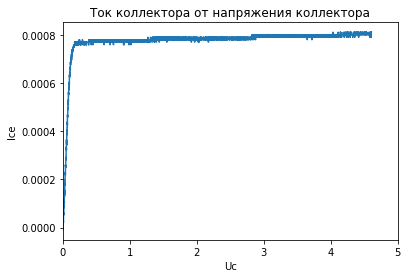

In [18]:
if not is_collector_fixed:
    plt.plot(df['Uce'], df['Ic'])
    plt.title("Ток коллектора от напряжения коллектора")
    plt.xlabel('Uc')
    plt.ylabel('Ice')
    plt.xlim([0,5])